# Bayesian methods for hackers - Chapter 1
![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Scipy
from scipy import stats

# Probabilistic programming
import edward as ed
import pyro

In [51]:
plt.style.use('ggplot')
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['grid.color'] = "#d4d4d4"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['lines.linewidth'] = 2

In [29]:
colors = ['#348ABD']

***
# Introduction

## Introduction

### Scipy and numpy for probabilities and statistics

##### Random Variables sampled from Bernoulli distribution

In [12]:
stats.bernoulli.rvs(0.5, size=10)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

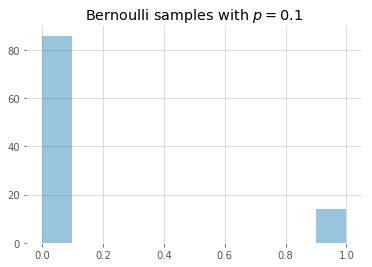

In [57]:
plt.title("Bernoulli samples with $p=0.1$")
plt.hist(stats.bernoulli.rvs(0.1, size=100),color = colors[0],alpha = 0.5)
plt.show()

##### Observing Bernoulli samples with a conjugate Binomial prior

In [45]:
def coin_toss(size = 10,p = 0.5):
    data = stats.bernoulli.rvs(p, size=size)
    x = np.linspace(0, 1, 100)
    heads = np.sum(data)
    tails = size - heads
    print("{} heads and {} tails for {} throws".format(heads,tails,size))
    y = stats.beta.pdf(x,1+heads,1+tails)
    plt.title("{} throws, $p={}$".format(size,p))
    plt.plot(x,y,color=colors[0])
    plt.fill_between(x, 0, y, color=colors[0], alpha=0.4)
    plt.vlines(p, 0, np.max(y), color="k", linestyles="--", lw=1)
    plt.show()

7 heads and 3 tails for 10 throws


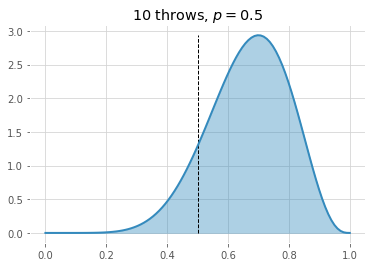

In [53]:
coin_toss()

60 heads and 40 tails for 100 throws


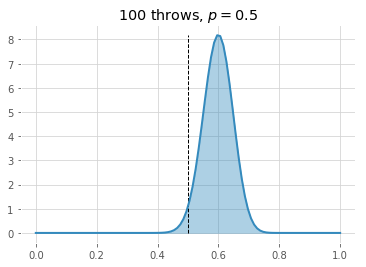

In [54]:
coin_toss(size = 100)

527 heads and 473 tails for 1000 throws


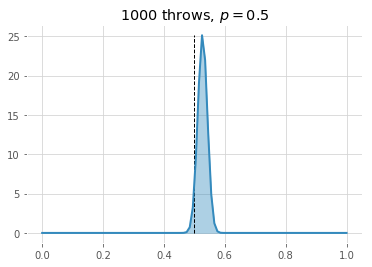

In [55]:
coin_toss(size = 1000)

1 heads and 9 tails for 10 throws


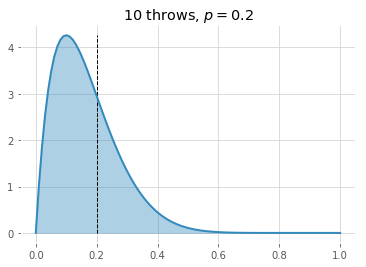

In [56]:
coin_toss(size = 10,p = 0.2)

## Distributions

### Poisson distribution

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

### Exponential distribution
$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

***
# The Bayesian coin toss

In [9]:
import pyro.distributions as dist

***
# The SMS behavior problem

## Description

## Creating the dataset

## Solving the problem

### Solving the problem with Edward

### Solving the problem with Pyro

## With other artificial datasets